### Hypothesis

We can predict how many medals a country will win at the Olympics by using historical data.

### The Data

A dataset of how many medals each country won at each Olympics.

In [1]:
import pandas as pd

In [5]:
from google.colab import files
import io
uploaded = files.upload()

Saving teams.csv to teams.csv


In [6]:
teams = pd.read_csv("teams.csv")

In [7]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [8]:
teams.corr()["medals"]

<ipython-input-8-90b4da85dcae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()["medals"]


year            -0.021603
events           0.771330
athletes         0.840817
age              0.025096
height           0.141055
weight           0.090577
medals           1.000000
prev_medals      0.920048
prev_3_medals    0.918438
Name: medals, dtype: float64

In [9]:
import seaborn as sns

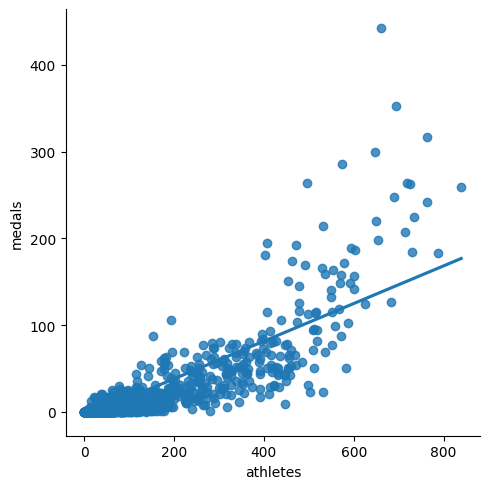

In [10]:
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=None)

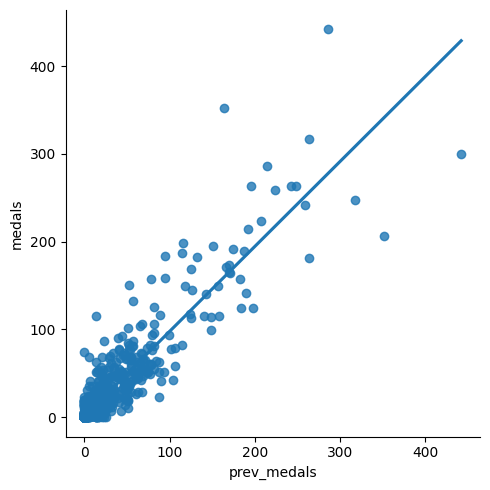

In [11]:
sns.lmplot(x="prev_medals", y="medals", data=teams, fit_reg=True, ci=None)

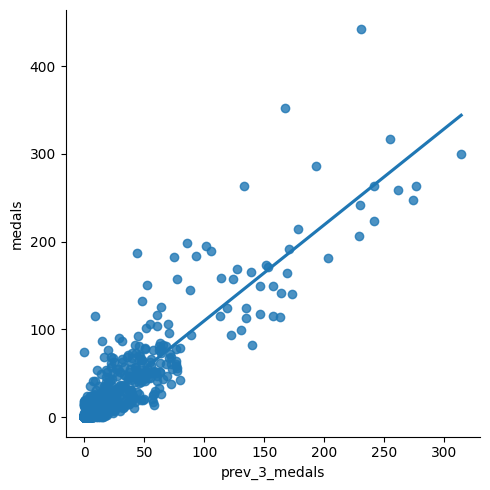

In [58]:
sns.lmplot(x="prev_3_medals", y="medals", data=teams, fit_reg=True, ci=None)

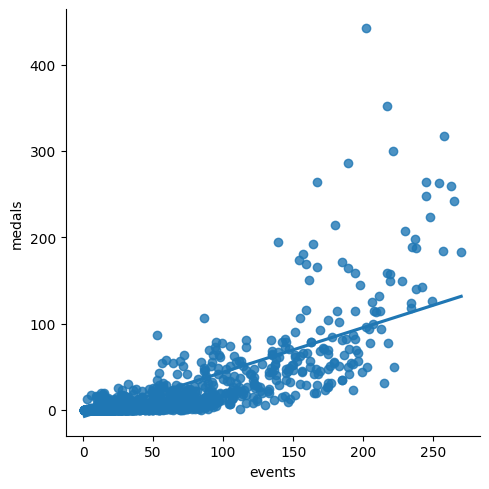

In [59]:
sns.lmplot(x="events", y="medals", data=teams, fit_reg=True, ci=None)

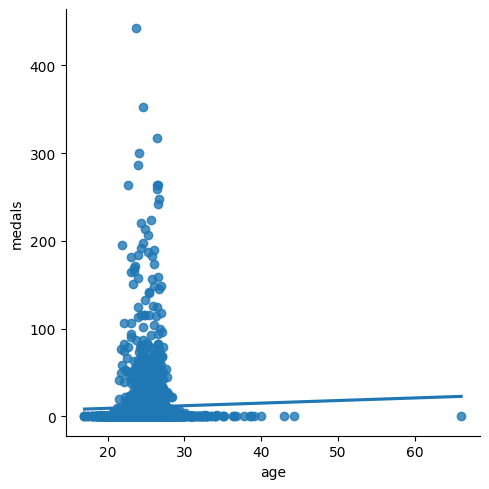

In [13]:
sns.lmplot(x="age", y="medals", data=teams, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

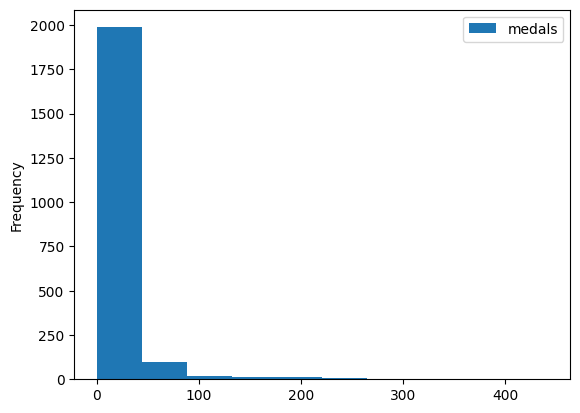

In [14]:
teams.plot.hist(y="medals")

In [15]:
teams[teams.isnull().any(axis=1)]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
19,ALB,Albania,1992,8,9,25.3,163.0,75.2,0,NaN,NaN
26,ALG,Algeria,1964,7,7,26.0,175.0,65.0,0,NaN,NaN
39,AND,Andorra,1976,2,3,28.3,174.7,78.0,0,NaN,NaN
50,ANG,Angola,1980,14,17,17.4,171.7,62.5,0,NaN,NaN
59,ANT,Antigua and Barbuda,1976,11,17,23.2,178.6,71.6,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,6,20.5,157.0,57.0,0,NaN,NaN
2103,YAR,North Yemen,1984,3,3,27.7,163.3,57.7,0,NaN,NaN
2105,YEM,Yemen,1992,8,8,19.6,169.0,60.0,0,NaN,NaN
2112,YMD,South Yemen,1988,5,5,23.6,175.0,63.3,0,NaN,NaN


In [16]:
teams = teams.dropna()

In [17]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [18]:
train = teams[teams["year"] < 2008].copy()
test = teams[teams["year"] >= 2008].copy()

In [19]:
train.shape

(1410, 11)

In [20]:
test.shape

(604, 11)

### Accuracy Metric

We'll use mean squared error. This is a good default regression accuracy metric. It's the average of squared differences between the actual results and your predictions.

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [60]:
predictors = ["prev_medals", "prev_3_medals", "athletes", "events"]
target = "medals"

In [61]:
reg.fit(train[predictors],train["medals"])

LinearRegression()

In [62]:
predictions = reg.predict(test[predictors])

In [63]:
predictions

array([ 7.68361365e-02,  2.59678731e-01,  9.24341112e-01,  7.68361365e-02,
       -1.28744401e+00, -5.59109530e-01, -2.64233900e-01, -2.89394512e+00,
       -3.20926175e-01, -9.99976673e-01, -9.36988818e-02, -2.64233900e-01,
        7.68361365e-02,  4.81293168e+00,  4.47186165e+00,  2.52129682e+00,
       -9.36988818e-02,  7.68361365e-02,  7.73218817e-01,  3.61003360e+01,
        4.34463119e+01,  4.30232600e+01, -2.51776207e+00, -8.05547470e-01,
       -1.88939667e+00,  4.17906173e-01,  7.68361365e-02, -4.75044754e-02,
        7.68361365e-02,  7.68361365e-02,  7.68361365e-02,  1.63905412e+02,
        1.54936583e+02,  1.38105219e+02,  2.09059091e+00, -3.31604665e+00,
       -3.02637345e+00, -8.40185365e-01, -3.75100695e+00, -1.41259638e+00,
        2.50532865e+00,  6.27544611e+00,  4.53125029e+00, -9.36988818e-02,
       -4.34768919e-01, -4.34768919e-01, -8.31580979e-01,  2.84017944e-01,
       -6.83450142e-01,  3.62164150e-01, -2.64233900e-01, -5.59109530e-01,
        6.98849590e+00,  

In [64]:
test["predictions"] = predictions

In [65]:
test

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
5,AFG,Afghanistan,2008,4,4,22.5,179.2,62.8,1,0.0,0.0,0.076836
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0,0.3,0.259679
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0,0.7,0.924341
18,AHO,Netherlands Antilles,2008,4,4,23.0,178.8,74.5,0,0.0,0.0,0.076836
23,ALB,Albania,2008,12,12,27.2,173.4,74.8,0,0.0,0.0,-1.287444
...,...,...,...,...,...,...,...,...,...,...,...,...
2131,ZAM,Zambia,2012,7,7,22.6,176.2,74.2,0,0.0,0.0,-0.434769
2132,ZAM,Zambia,2016,7,7,24.1,175.2,67.5,0,0.0,0.0,-0.434769
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0,0.027683
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,2.127984


In [66]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [67]:
test

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
5,AFG,Afghanistan,2008,4,4,22.5,179.2,62.8,1,0.0,0.0,0.076836
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0,0.3,0.259679
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0,0.7,0.924341
18,AHO,Netherlands Antilles,2008,4,4,23.0,178.8,74.5,0,0.0,0.0,0.076836
23,ALB,Albania,2008,12,12,27.2,173.4,74.8,0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2131,ZAM,Zambia,2012,7,7,22.6,176.2,74.2,0,0.0,0.0,0.000000
2132,ZAM,Zambia,2016,7,7,24.1,175.2,67.5,0,0.0,0.0,0.000000
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0,0.027683
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,2.127984


In [68]:
test["predictions"] = test["predictions"].round()

In [69]:
test

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
5,AFG,Afghanistan,2008,4,4,22.5,179.2,62.8,1,0.0,0.0,0.0
6,AFG,Afghanistan,2012,6,6,24.8,171.7,60.8,1,1.0,0.3,0.0
7,AFG,Afghanistan,2016,3,3,24.7,173.7,74.0,0,1.0,0.7,1.0
18,AHO,Netherlands Antilles,2008,4,4,23.0,178.8,74.5,0,0.0,0.0,0.0
23,ALB,Albania,2008,12,12,27.2,173.4,74.8,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2131,ZAM,Zambia,2012,7,7,22.6,176.2,74.2,0,0.0,0.0,0.0
2132,ZAM,Zambia,2016,7,7,24.1,175.2,67.5,0,0.0,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0,0.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,2.0


In [70]:
from sklearn.metrics import mean_absolute_error
err = mean_absolute_error(test["medals"], test["predictions"])

In [71]:
err

3.564569536423841

In [72]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

err  < std

In [73]:
test[test["team"] == "USA"]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
2052,USA,United States,2008,258,763,26.4,177.7,74.4,317,263.0,254.7,271.0
2053,USA,United States,2012,245,689,26.7,178.3,74.7,248,317.0,274.0,290.0
2054,USA,United States,2016,245,719,26.4,178.0,73.8,264,248.0,276.0,269.0


In [74]:
test[test["team"] == "IND"]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
906,IND,India,2008,48,67,25.4,173.1,72.6,3,1.0,1.0,0.0
907,IND,India,2012,55,95,26.0,174.2,72.7,6,3.0,1.7,2.0
908,IND,India,2016,67,130,26.1,170.0,66.3,2,6.0,3.3,7.0


In [75]:
errors = (test["medals"] - test["predictions"]).abs()

In [76]:
errors

5       1.0
6       1.0
7       1.0
18      0.0
23      0.0
       ... 
2131    0.0
2132    0.0
2141    4.0
2142    2.0
2143    3.0
Length: 604, dtype: float64

In [77]:
error_by_team = errors.groupby(test["team"]).mean()

In [78]:
error_by_team

team
AFG    1.000000
AHO    0.000000
ALB    0.000000
ALG    1.666667
AND    0.000000
         ...   
VIE    1.000000
VIN    0.000000
YEM    0.000000
ZAM    0.000000
ZIM    3.000000
Length: 206, dtype: float64

In [79]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

In [80]:
error_ratio = error_by_team / medals_by_team

In [81]:
error_ratio

team
AFG    1.50
AHO     NaN
ALB     NaN
ALG    1.00
AND     NaN
       ... 
VIE    1.00
VIN     NaN
YEM     NaN
ZAM     NaN
ZIM    2.25
Length: 206, dtype: float64

In [82]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.500000
ALG    1.000000
ANG         inf
ANT         inf
ARG    0.652174
         ...   
USA    0.112183
UZB    1.000000
VEN    1.000000
VIE    1.000000
ZIM    2.250000
Length: 123, dtype: float64

In [83]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [84]:
error_ratio

team
AFG    1.500000
ALG    1.000000
ARG    0.652174
ARM    1.000000
AUS    0.324638
         ...   
USA    0.112183
UZB    1.000000
VEN    1.000000
VIE    1.000000
ZIM    2.250000
Length: 107, dtype: float64

<Axes: ylabel='Frequency'>

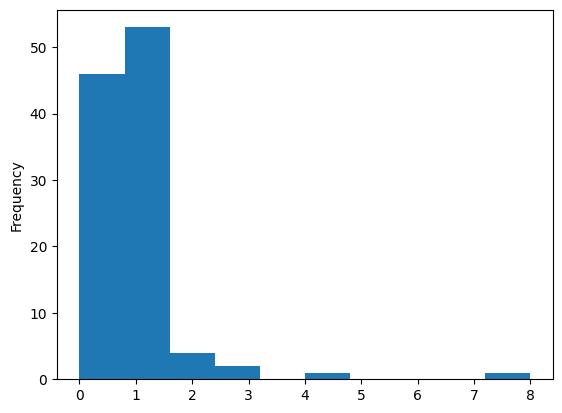

In [85]:
error_ratio.plot.hist()

In [86]:
error_ratio.sort_values()

team
CHI    0.000000
FRA    0.086275
ETH    0.090909
USA    0.112183
HUN    0.120000
         ...   
ZIM    2.250000
CIV    2.500000
BOT    3.000000
UAE    4.000000
CMR    8.000000
Length: 107, dtype: float64